In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

#### Generated Dataset for regression: 

In [2]:
X, y = make_regression(n_samples = 250, n_features = 1, n_targets = 1, noise = 50)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Linear Regression: 

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(X_test)

In [8]:
from sklearn.metrics import r2_score

In [9]:
r2_score(y_test, y_pred)

0.5355846926972819

#### Ridge Regression: scikit learn class

In [10]:
from sklearn.linear_model import Ridge

In [26]:
lr_ridge = Ridge(alpha=1)

In [27]:
lr_ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [28]:
y_pred_ridge = lr_ridge.predict(X_test)

In [29]:
r2_score(y_test, y_pred_ridge)

0.5349248938988265

Text(0.5, 1.0, 'Ridge Simple Linear Regression')

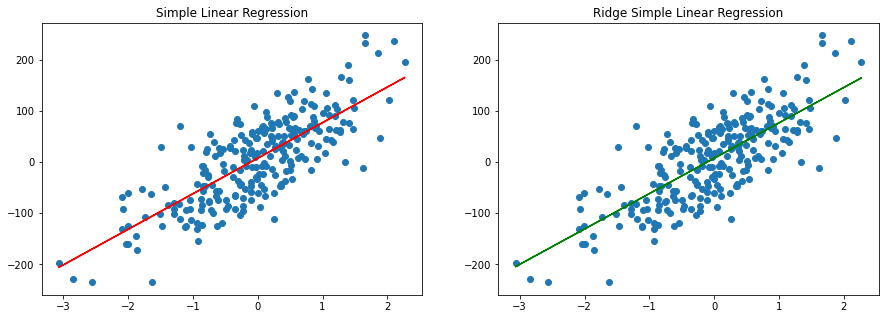

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
ax[0].scatter(X, y)
ax[1].scatter(X, y)
ax[0].plot(X_train, lr.predict(X_train), c='r') # x_train used because to extend the line
ax[1].plot(X_train, lr_ridge.predict(X_train), c='g')
ax[0].set_title('Simple Linear Regression')
ax[1].set_title('Ridge Simple Linear Regression')

In [16]:
class RidgeLR:
    
    def __init__(self, alpha):
        self.b = None
        self.m = None
        self.alpha = alpha
        
    def fit(self, x_train, y_train):
        
        num = np.sum(np.dot((y_train - np.mean(y_train)),(x_train - np.mean(x_train))))
        den = np.sum((x_train - np.mean(x_train))**2) + self.alpha
        self.m = num/den
        self.b = np.mean(y_train) - self.m*np.mean(x_train)
        
    def predict(self, x_test):
        return self.m*x_test + self.b

In [17]:
lr_ridge_class = RidgeLR(0.1)

In [18]:
lr_ridge_class.fit(X_train, y_train)

In [19]:
y_pred_ridge_class = lr_ridge_class.predict(X_test)

In [20]:
r2_score(y_test, y_pred_ridge_class)

0.5355195247656606